In [66]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def get_soup(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    r=requests.get(url, headers=headers)
    soup=BeautifulSoup(r.content, 'html.parser')
    return soup

url='https://en.wikipedia.org/wiki/List_of_regional_organizations_by_population'
soup=get_soup(url)


In [49]:
data=list(filter(lambda x: x is not None, [i.find_all('td') if len(i.find_all('td')) >= 6 else None
    for i in soup.find_all('table')[1].find_all('tr')]))

In [50]:
lst_org=[]
for org in data:
    org_name=org[1].a.get('title')
    link='https://en.wikipedia.org' + org[1].a.get('href')
    if org[5].table is not None:
        lst_member=set([i.get('title') for i in org[5].table.find_all('tr')[1].td.find_all('a')])
    else:
        lst_member=None
    lst_org.append({'name': org_name, 'link': link, 'members': lst_member})
lst_org[-1]

{'name': 'Organisation of Eastern Caribbean States',
 'link': 'https://en.wikipedia.org/wiki/Organisation_of_Eastern_Caribbean_States',
 'members': {'Antigua and Barbuda',
  'Dominica',
  'Grenada',
  'Montserrat',
  'Saint Kitts and Nevis',
  'Saint Lucia',
  'Saint Vincent and the Grenadines'}}

In [92]:
import re
for org in lst_org:
    if org['members'] is not None:
        for member in org['members']:
            if re.match('.*brazil.*', member.lower()):
                print(org)


{'name': 'BRICS', 'link': 'https://en.wikipedia.org/wiki/BRICS', 'members': {'India', 'South Africa', 'Brazil', 'Russia', 'China'}}
{'name': 'South Atlantic Peace and Cooperation Zone', 'link': 'https://en.wikipedia.org/wiki/South_Atlantic_Peace_and_Cooperation_Zone', 'members': {'South Africa', 'Angola', 'Guinea-Bissau', 'Sierra Leone', 'Democratic Republic of the Congo', 'Togo', 'Liberia', 'Uruguay', 'Ivory Coast', 'Brazil', 'Senegal', 'The Gambia', 'Nigeria', 'Benin', 'Republic of the Congo', 'Equatorial Guinea', 'São Tomé and Príncipe', 'Argentina', 'Ghana', 'Cape Verde', 'Cameroon', 'Guinea', 'Gabon', 'Namibia'}}
{'name': 'Organization of American States', 'link': 'https://en.wikipedia.org/wiki/Organization_of_American_States', 'members': {'Antigua and Barbuda', 'El Salvador', 'Haiti', 'Venezuela', 'United States', 'Dominica', 'Uruguay', 'Barbados', 'Jamaica', 'Saint Kitts and Nevis', 'Guyana', 'Brazil', 'Colombia', 'Nicaragua', 'Canada', 'Ecuador', 'Mexico', 'The Bahamas', 'Argen

In [59]:

G=nx.Graph()
for node in lst_org:
    if node['members'] is not None:
        org_name=node['name']
        G.add_nodes_from([(org_name, {'type': 'organisation'})], weight=5)
        for member in node['members']:
            G.add_nodes_from([(member, {'type': 'member'})], weight=1)
            G.add_edge(org_name, member)



816.0


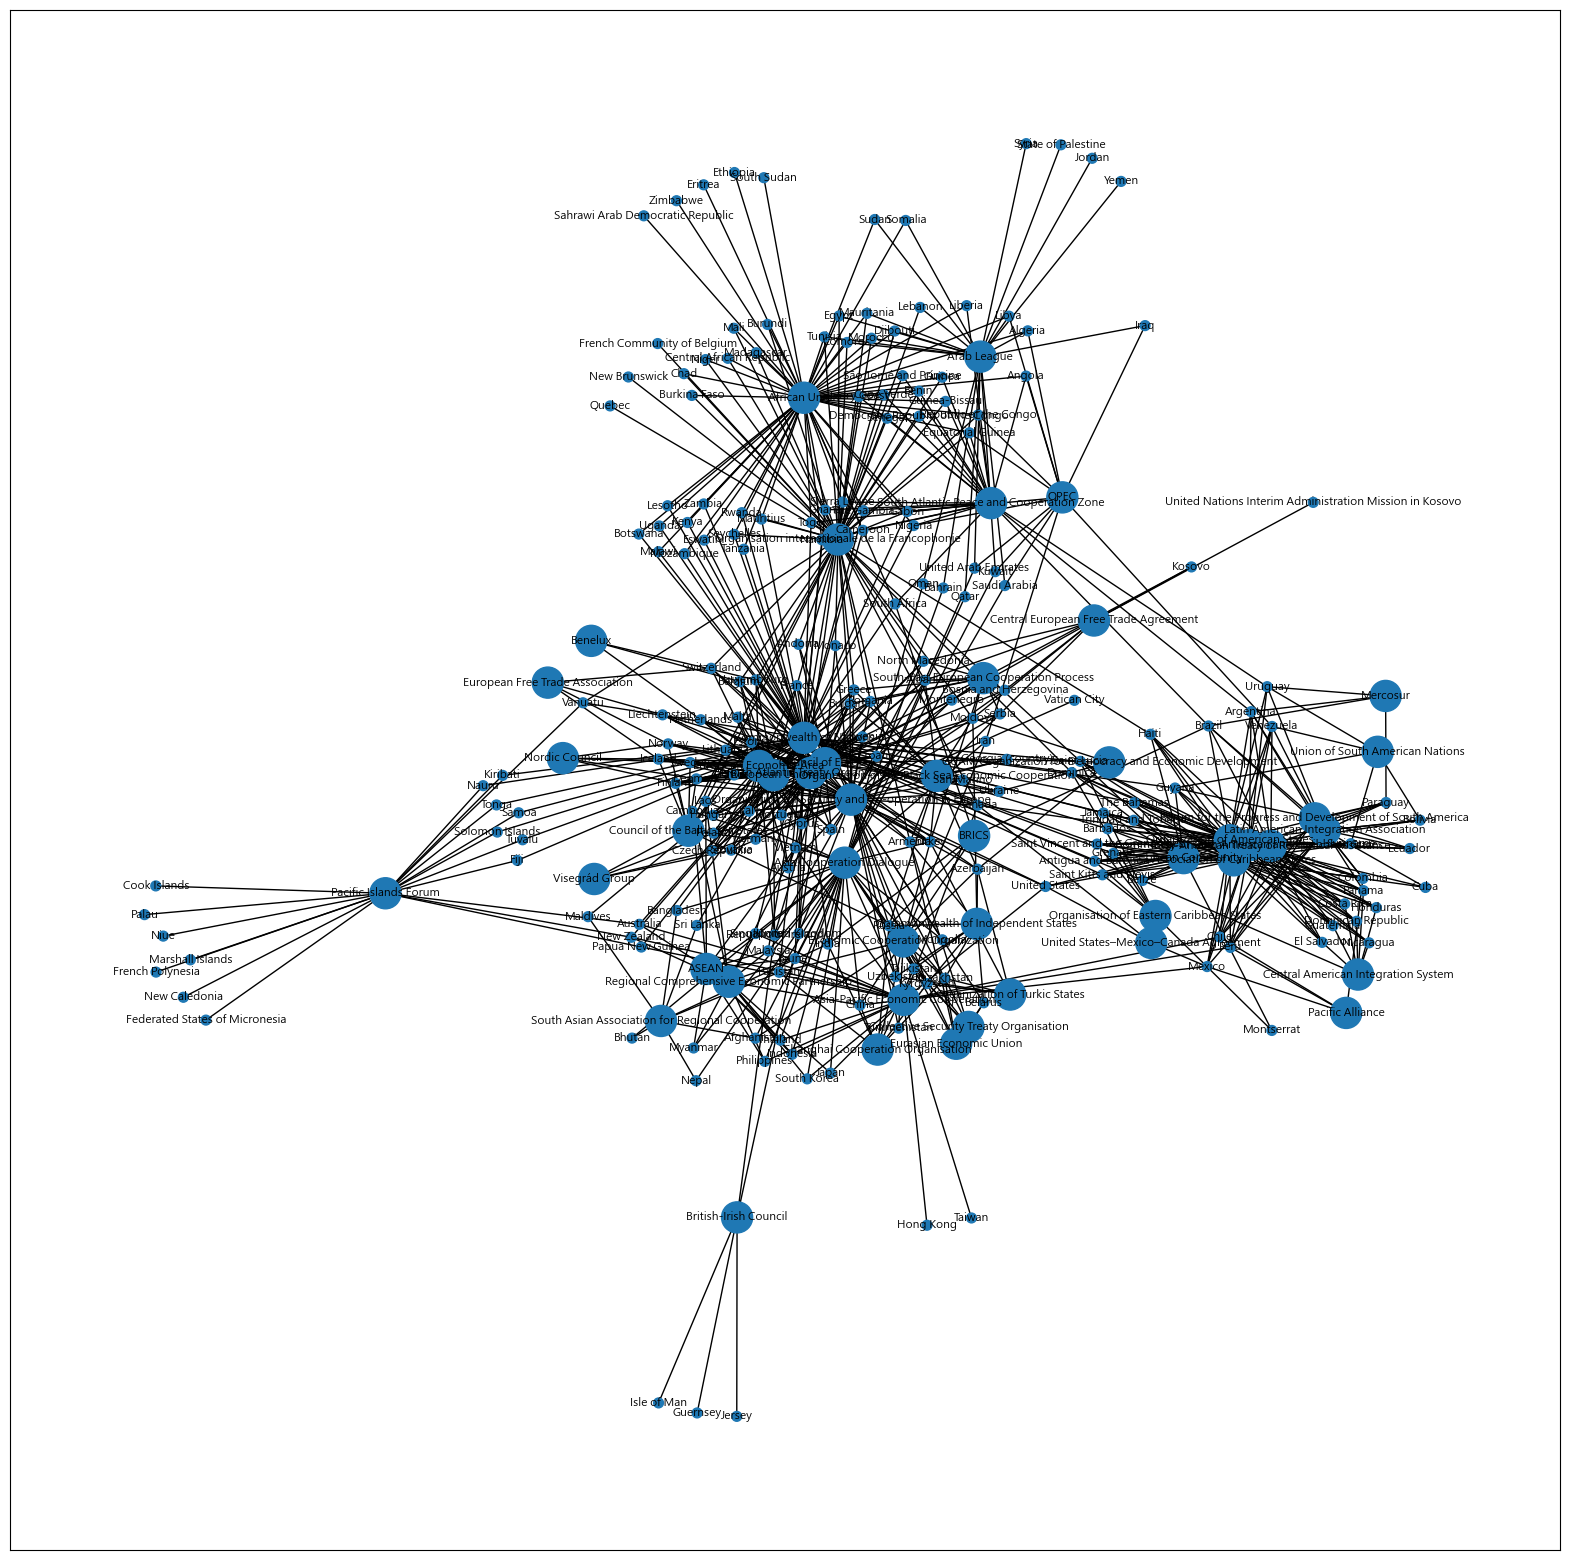

In [67]:
weight={node[0]:1 if node[1]['type']=='member' else 10 for node in G.nodes(data=True)}
nx.set_node_attributes(G, weight ,'weight')

plt.rcParams['font.sans-serif']='Microsoft JhengHei'
print(G.size(weight="weight"))
plt.figure(3,figsize=(20,20))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=[i*50 for i in nx.get_node_attributes(G,'weight').values()] ,font_size=8)